In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
'''import tensorflow as tf'''

'import tensorflow as tf'

In [8]:
'''tf.test.gpu_device_name()
print(tf.config.list_physical_devices())'''

'tf.test.gpu_device_name()\nprint(tf.config.list_physical_devices())'

In [9]:
df1 = pd.read_csv('2017.csv')
df2 = pd.read_csv('41.094064, 29.0... 2017-01-01 to 2017-12-31 (2) (1).csv')

FileNotFoundError: [Errno 2] No such file or directory: '41.094064, 29.0... 2017-01-01 to 2017-12-31 (2) (1).csv'

In [ ]:
df2 = df2.cloudcover

In [ ]:
df = pd.concat([df1, df2], axis= 1)

In [ ]:
df = df.drop('Unnamed: 23', 1)

In [ ]:
df = df_no_zero = df.loc[df['DHI']!= 0 ]
assert len(df_no_zero['DHI'])==len(df_no_zero['GHI']), "Some DHI 0s where GHI is not 0"
df['DHI_log'] = np.log(df['DHI'])
df['GHI_log'] = np.log(df['GHI'])
df['cloud_cover_log'] = np.log(df['cloudcover']+0.0000001)

In [ ]:
df.shape

(4329, 27)

In [ ]:
df.head(n=20)


,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,cloudcover,DHI_log,GHI_log,cloud_cover_log
count,4329.0,4329.000000,4329.000000,4329.000000,4329.0,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,...,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,2017.0,6.435435,15.769231,9.573574,30.0,17.209610,116.100023,599.567337,456.863479,2.353892,...,59.037147,0.160973,1012.705706,2.062809,136.225225,3.376738,45.354655,4.388297,5.100837,0.041466
std,0.0,3.194634,8.796640,3.566014,0.0,7.480998,57.491178,235.327490,275.317986,2.606415,...,18.535605,0.138586,5.729360,0.868890,108.871485,1.704461,36.200309,1.047639,1.448784,7.627138
min,2017.0,1.000000,1.000000,3.000000,30.0,-2.900000,2.000000,0.000000,2.000000,0.000000,...,18.380000,0.100000,998.000000,0.400000,0.000000,0.400000,0.000000,0.000000,0.000000,-16.118096
25%,2017.0,4.000000,8.000000,7.000000,30.0,11.500000,77.000000,461.000000,231.000000,0.000000,...,45.940000,0.120000,1009.000000,1.400000,42.000000,2.000000,2.700000,3.871201,4.143135,0.993252
50%,2017.0,6.000000,16.000000,10.000000,30.0,17.400000,111.000000,662.000000,441.000000,2.000000,...,61.540000,0.140000,1012.000000,2.000000,80.000000,3.100000,42.800000,4.615121,5.533389,3.756538
75%,2017.0,9.000000,23.000000,13.000000,30.0,23.800000,148.000000,783.000000,682.000000,4.000000,...,73.310000,0.140000,1016.000000,2.700000,233.000000,4.500000,85.200000,5.081404,6.309918,4.445001
max,2017.0,12.000000,31.000000,17.000000,30.0,34.200000,414.000000,976.000000,996.000000,12.000000,...,88.990000,0.870000,1031.000000,4.600000,360.000000,9.500000,99.300000,6.159095,6.903747,4.598146


In [ ]:
df.describe()

Text(0.5, 1.0, 'Missing value in the dataset')

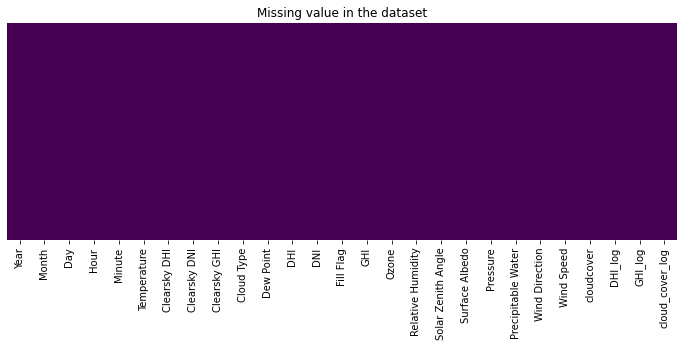

In [ ]:
#Visualize summary of null values.
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

<AxesSubplot:>

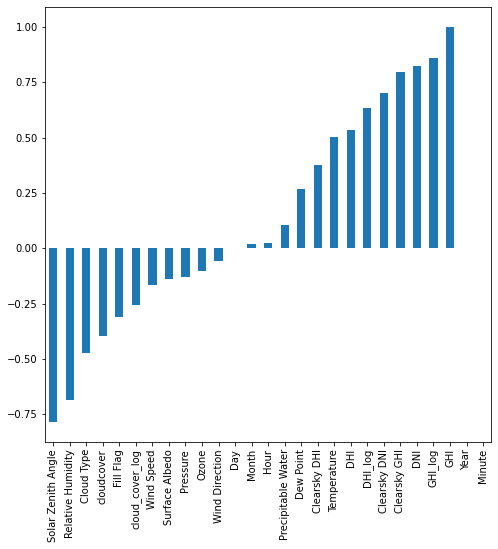

In [ ]:
#correlation between columns
df.corr()["GHI"].sort_values().plot(kind="bar", figsize=(8,8))

<AxesSubplot:>

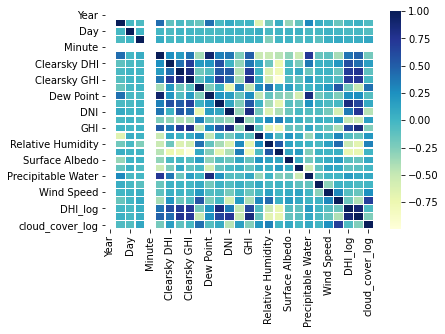

In [ ]:
#Correlation Plot more visualize version.
corr = df.corr()
sns.heatmap(corr,cmap="YlGnBu", linewidths=.5)

In [ ]:
independent_values = df.drop(['GHI','Year','Day','Month','Hour','Minute'], axis = 1)
target =df['GHI']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent_values,target,test_size = 0.33)

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_sm = sm.add_constant(x_train)

In [ ]:
lr=sm.OLS(y_train,x_train_sm).fit()

In [ ]:
lr

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    GHI   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     4049.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        14:21:50   Log-Likelihood:                -15574.
No. Observations:                2900   AIC:                         3.119e+04
Df Residuals:                    2878   BIC:                         3.132e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -172.7953    271

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(independent_values,target,test_size = 0.2)

In [ ]:
x_train_sm = sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    GHI   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     4944.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        14:22:42   Log-Likelihood:                -18553.
No. Observations:                3463   AIC:                         3.715e+04
Df Residuals:                    3441   BIC:                         3.728e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -217.8877    245